In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter

In [8]:
hdulist = fits.open('/Users/thepoetoftwilight/Desktop/F0252_FI_IFS_0301354_RED_WXY_300480-300520.fits')

In [9]:
hdulist.info()

Filename: /Users/thepoetoftwilight/Desktop/F0252_FI_IFS_0301354_RED_WXY_300480-300520.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     314   ()      
  1  FLUX          1 ImageHDU        28   (34, 34, 71)   float64   
  2  ERROR         1 ImageHDU        28   (34, 34, 71)   float64   
  3  UNCORRECTED_FLUX    1 ImageHDU        28   (34, 34, 71)   float64   
  4  UNCORRECTED_ERROR    1 ImageHDU        28   (34, 34, 71)   float64   
  5  WAVELENGTH    1 ImageHDU         7   (71,)   float64   
  6  X             1 ImageHDU         7   (34,)   float64   
  7  Y             1 ImageHDU         7   (34,)   float64   
  8  TRANSMISSION    1 ImageHDU         7   (71,)   float32   
  9  RESPONSE      1 ImageHDU         7   (71,)   float32   
 10  EXPOSURE_MAP    1 ImageHDU        28   (34, 34, 71)   int16   


In [10]:
wavelengths = hdulist[5].data

print(wavelengths)

wav_diff = []

for i in range(0, len(wavelengths)-1):
    wav_diff.append(wavelengths[i+1]-wavelengths[i])
  
wav_diff = np.average(wav_diff)

print(wav_diff)

[157.49899531 157.5154611  157.5319269  157.54839269 157.56485848
 157.58132428 157.59779007 157.61425586 157.63072166 157.64718745
 157.66365324 157.68011904 157.69658483 157.71305062 157.72951642
 157.74598221 157.762448   157.7789138  157.79537959 157.81184538
 157.82831118 157.84477697 157.86124276 157.87770856 157.89417435
 157.91064014 157.92710594 157.94357173 157.96003752 157.97650332
 157.99296911 158.0094349  158.0259007  158.04236649 158.05883228
 158.07529808 158.09176387 158.10822966 158.12469545 158.14116125
 158.15762704 158.17409283 158.19055863 158.20702442 158.22349021
 158.23995601 158.2564218  158.27288759 158.28935339 158.30581918
 158.32228497 158.33875077 158.35521656 158.37168235 158.38814815
 158.40461394 158.42107973 158.43754553 158.45401132 158.47047711
 158.48694291 158.5034087  158.51987449 158.53634029 158.55280608
 158.56927187 158.58573767 158.60220346 158.61866925 158.63513505
 158.65160084]
0.016465793305814762


In [11]:
hdulist_spec = fits.open('/Users/thepoetoftwilight/Desktop/F0252_FI_IFS_0301354_RED_WXY_300480-300520-1D.fits')

In [12]:
central_fluxes_unfiltered = hdulist_spec[0].data
    
central_fluxes_unfiltered = [flux*(10**(-26)) for flux in central_fluxes_unfiltered]

c = 3*10**8

for i in range(0, len(wavelengths)):
    
    wavelength = wavelengths[i]
    
    central_fluxes_unfiltered[i] = central_fluxes_unfiltered[i]*(c/(wavelength*10**(-6))**2)*(10**(-6))
    
central_fluxes_unfiltered = np.array(central_fluxes_unfiltered)

In [13]:
print(central_fluxes_unfiltered)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.61233623e-15
 4.91180556e-15 8.00818220e-15 9.09026260e-15 9.00986608e-15
 7.12390470e-15 7.69460199e-15 8.02529940e-15 4.67115849e-15
 5.66317457e-15 5.74348756e-15 5.71551339e-15 5.31651798e-15
 5.59322268e-15 5.07840957e-15 5.89582442e-15 4.95092518e-15
 4.71622572e-15 4.45893017e-15 5.22735411e-15 5.02771486e-15
 6.36578399e-15 7.46804087e-15 8.73733962e-15 8.74952823e-15
 1.04892973e-14 1.18995991e-14 1.53622219e-14 1.98117686e-14
 2.47932714e-14 2.97962060e-14 3.62024950e-14 4.27663182e-14
 4.62325596e-14 4.68659954e-14 4.54599872e-14 3.84465243e-14
 3.10166342e-14 2.38587660e-14 1.86861198e-14 1.40548353e-14
 1.28528224e-14 1.04527475e-14 1.01505488e-14 8.53614170e-15
 7.68465408e-15 8.09055835e-15 7.46180456e-15 8.92694356e-15
 6.59274075e-15 6.83857813e-15 6.44947476e-15 4.91693254e-15
 8.02140996e-15 6.82368731e-15 8.69672487e-15 7.73461606e-15
 7.72310492e-15 6.87843546e-15 7.74743575e-15 5.54622646e-15
 2.91241095e-15 4.304554

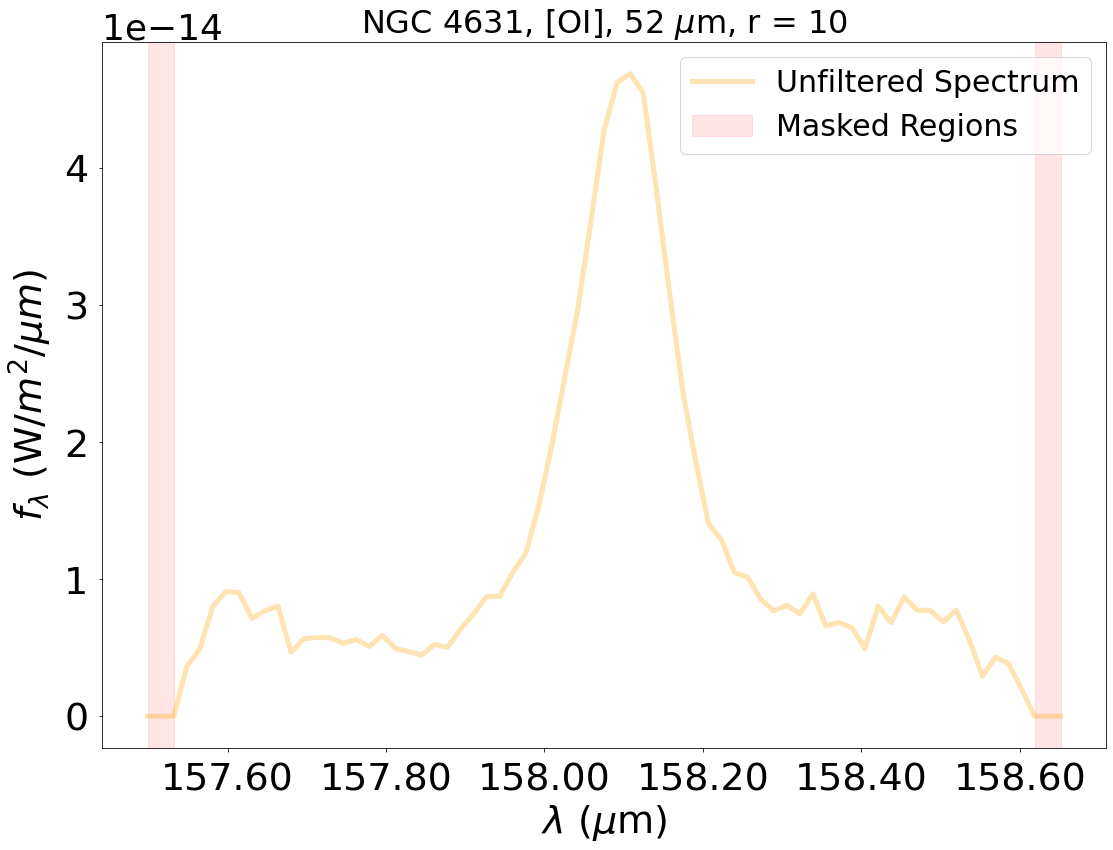

In [29]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths, central_fluxes_unfiltered, label = 'Unfiltered Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.axvspan(wavelengths[0], wavelengths[2], color = 'red', alpha = 0.1, label = 'Masked Regions')
ax.axvspan(wavelengths[-3], wavelengths[-1], color = 'red', alpha = 0.1)

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OI], 52 $\mu$m, r = 10', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

plt.savefig('/Users/thepoetoftwilight/Desktop/1-[OI]-unfiltered_spectrum.png')

ax.legend(prop={'size': 30}, loc = 'upper right')

In [22]:
central_fluxes_filtered = central_fluxes_unfiltered

wavelengths_filtered = wavelengths[2:-2]
central_fluxes_filtered = central_fluxes_filtered[2:-2]

print(central_fluxes_filtered)

[0.00000000e+00 3.61233623e-15 4.91180556e-15 8.00818220e-15
 9.09026260e-15 9.00986608e-15 7.12390470e-15 7.69460199e-15
 8.02529940e-15 4.67115849e-15 5.66317457e-15 5.74348756e-15
 5.71551339e-15 5.31651798e-15 5.59322268e-15 5.07840957e-15
 5.89582442e-15 4.95092518e-15 4.71622572e-15 4.45893017e-15
 5.22735411e-15 5.02771486e-15 6.36578399e-15 7.46804087e-15
 8.73733962e-15 8.74952823e-15 1.04892973e-14 1.18995991e-14
 1.53622219e-14 1.98117686e-14 2.47932714e-14 2.97962060e-14
 3.62024950e-14 4.27663182e-14 4.62325596e-14 4.68659954e-14
 4.54599872e-14 3.84465243e-14 3.10166342e-14 2.38587660e-14
 1.86861198e-14 1.40548353e-14 1.28528224e-14 1.04527475e-14
 1.01505488e-14 8.53614170e-15 7.68465408e-15 8.09055835e-15
 7.46180456e-15 8.92694356e-15 6.59274075e-15 6.83857813e-15
 6.44947476e-15 4.91693254e-15 8.02140996e-15 6.82368731e-15
 8.69672487e-15 7.73461606e-15 7.72310492e-15 6.87843546e-15
 7.74743575e-15 5.54622646e-15 2.91241095e-15 4.30455491e-15
 3.83108548e-15 2.004717

In [25]:
central_fluxes_filtered_continuum = []

left_cut = 157.9
right_cut = 158.3

for i in range(0, len(wavelengths_filtered)):
    
    wavelength = wavelengths_filtered[i]
    
    if(wavelength < left_cut or wavelength > right_cut):
        central_fluxes_filtered_continuum.append(central_fluxes_filtered[i])
    
    else:
        central_fluxes_filtered_continuum.append(float("Nan"))
        
central_fluxes_filtered_continuum = np.array(central_fluxes_filtered_continuum)

print(central_fluxes_filtered_continuum)

[0.00000000e+00 3.61233623e-15 4.91180556e-15 8.00818220e-15
 9.09026260e-15 9.00986608e-15 7.12390470e-15 7.69460199e-15
 8.02529940e-15 4.67115849e-15 5.66317457e-15 5.74348756e-15
 5.71551339e-15 5.31651798e-15 5.59322268e-15 5.07840957e-15
 5.89582442e-15 4.95092518e-15 4.71622572e-15 4.45893017e-15
 5.22735411e-15 5.02771486e-15 6.36578399e-15            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan 8.09055835e-15
 7.46180456e-15 8.92694356e-15 6.59274075e-15 6.83857813e-15
 6.44947476e-15 4.91693254e-15 8.02140996e-15 6.82368731e-15
 8.69672487e-15 7.73461606e-15 7.72310492e-15 6.87843546e-15
 7.74743575e-15 5.54622646e-15 2.91241095e-15 4.30455491e-15
 3.83108548e-15 2.004717

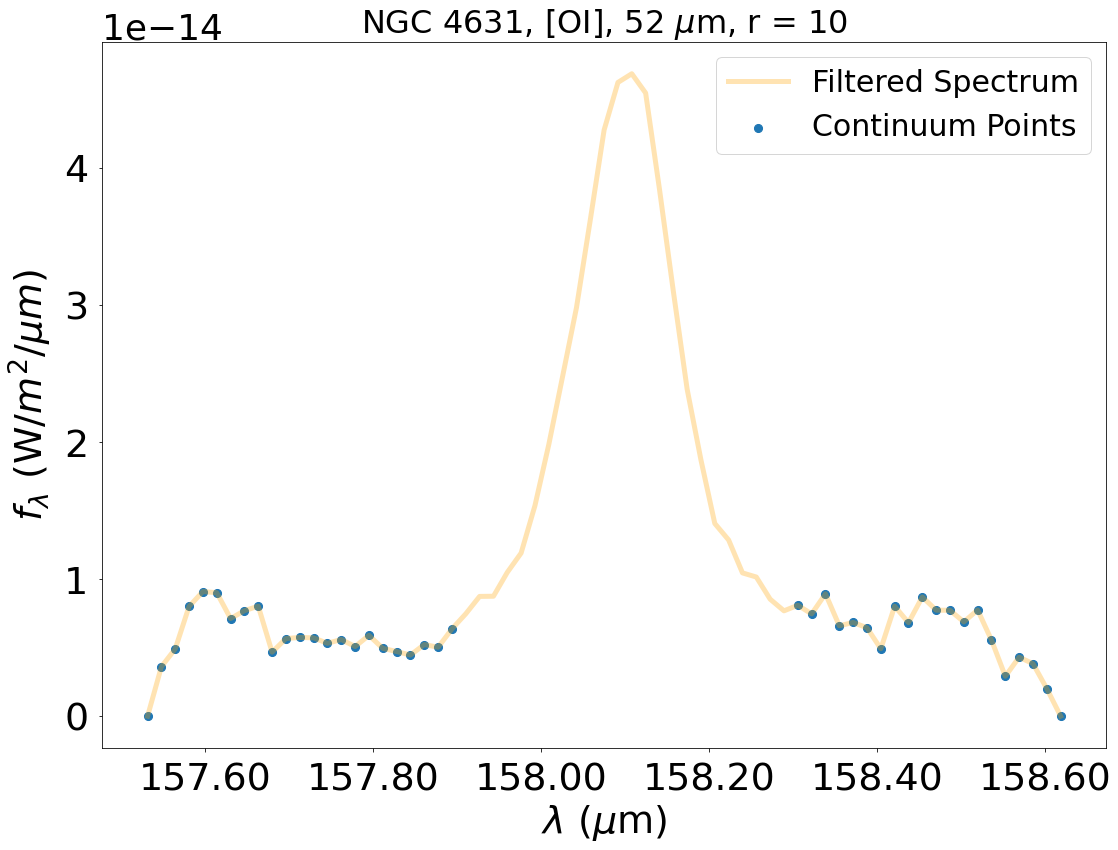

In [30]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Filtered Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OI], 52 $\mu$m, r = 10', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 30}, loc = 'upper right')

In [27]:
idcont = np.isfinite(central_fluxes_filtered_continuum)
cont_params = np.polyfit(wavelengths_filtered[idcont], central_fluxes_filtered_continuum[idcont], 1)

print(cont_params)

cont_line_filtered = cont_params[0]*wavelengths_filtered + cont_params[1]

[-1.20736676e-16  2.49768902e-14]


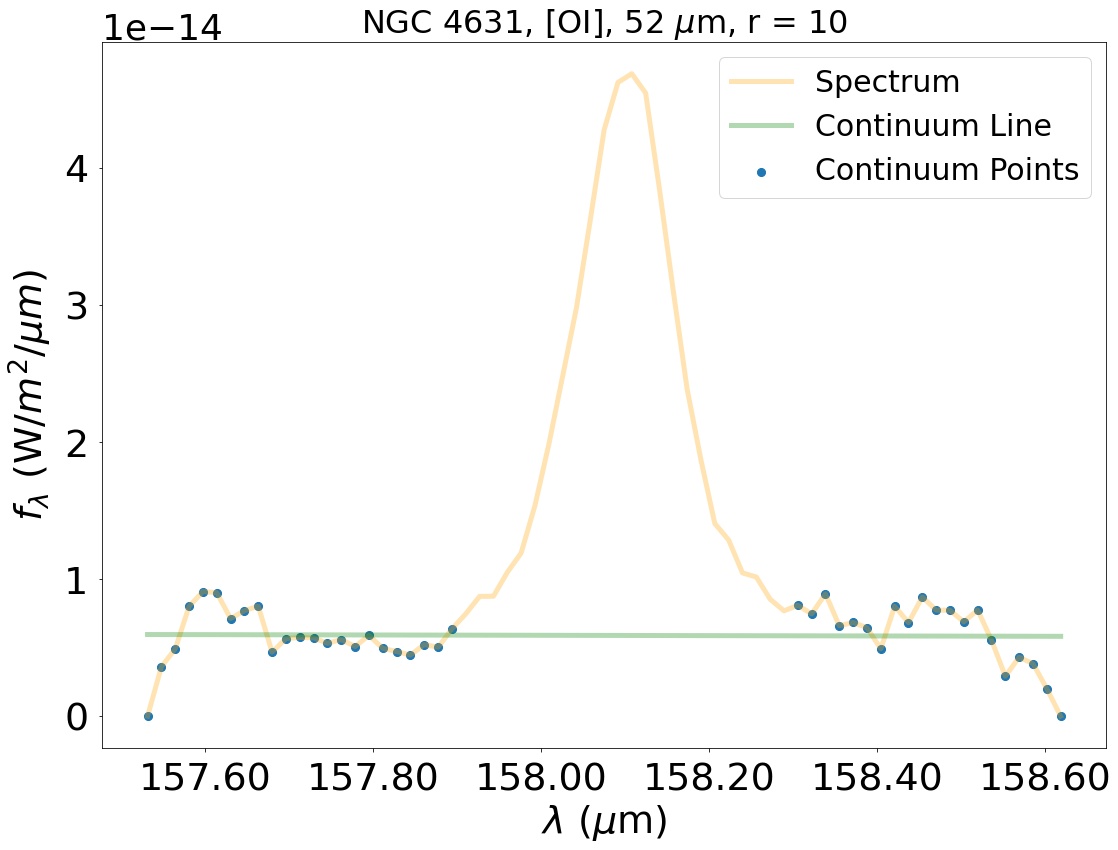

In [31]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.plot(wavelengths_filtered, cont_line_filtered, label = 'Continuum Line', lw = 5, color = 'green', alpha = 0.3)
ax.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OI], 52 $\mu$m, r = 10', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 30}, loc = 'upper right')

In [32]:
id_act = np.isnan(central_fluxes_filtered_continuum)

wavelengths_act = wavelengths_filtered[id_act]
central_fluxes_filtered_act = central_fluxes_filtered[id_act]
cont_line_filtered_act = cont_line_filtered[id_act]

central_fluxes_continuum_subtracted_act = central_fluxes_filtered_act - cont_line_filtered_act

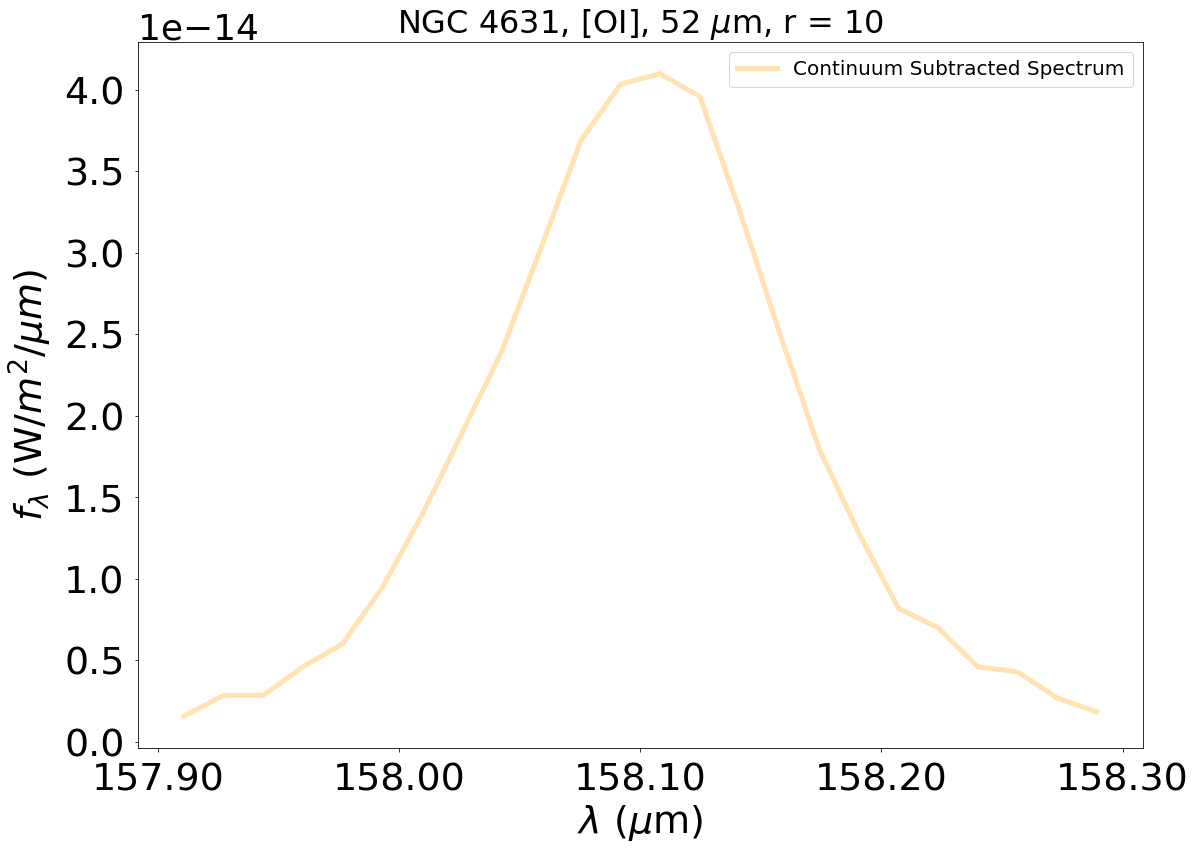

In [33]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths_act, central_fluxes_continuum_subtracted_act, label = 'Continuum Subtracted Spectrum', lw = 5, color = 'orange', alpha = 0.3)

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OI], 52 $\mu$m, r = 10', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 20}, loc = 'upper right')

In [34]:
def fit_func_1(Z, peak_height, mu, sigma):
    
    P = peak_height*np.exp(-((Z-mu)**2/(2*sigma**2)))
    
    return P

In [35]:
heights = central_fluxes_continuum_subtracted_act/np.max(central_fluxes_continuum_subtracted_act)

centers = wavelengths_act

# Information about the peak in the numerical PDF
peak_ind = np.where(heights == np.max(heights))[0][0]
peak_height = np.max(heights)

# mu is where the numerical PDF peaks
mu = centers[peak_ind]

# Estimating sigma using FWHM
sigma = 0

for i in range(0, peak_ind):
    if(heights[i] >= peak_height/2):
        sigma = (mu - centers[i])/np.sqrt(2*np.log(2))
        break

# First fit a Gaussian

guess_params = np.array([peak_height, sigma])
fit_params, fit_covar = optimize.curve_fit(lambda centers, peak_height, sigma: 
                                           fit_func_1(centers, peak_height, mu, sigma), 
                                           centers, heights, p0=guess_params)

fit_params = [fit_params[0], mu, fit_params[1]]

fit_params[0] *= np.max(central_fluxes_continuum_subtracted_act)

print(fit_params)

[3.990791781673355e-14, 158.10822966168888, 0.062179086054611074]


[2.56027823e-16 2.69417762e-16 2.83434658e-16 2.98103691e-16
 3.13450830e-16 3.29502841e-16 3.46287308e-16 3.63832637e-16
 3.82168074e-16 4.01323715e-16 4.21330515e-16 4.42220299e-16
 4.64025774e-16 4.86780536e-16 5.10519076e-16 5.35276793e-16
 5.61089996e-16 5.87995910e-16 6.16032686e-16 6.45239396e-16
 6.75656045e-16 7.07323565e-16 7.40283820e-16 7.74579605e-16
 8.10254643e-16 8.47353581e-16 8.85921986e-16 9.26006340e-16
 9.67654033e-16 1.01091335e-15 1.05583346e-15 1.10246442e-15
 1.15085713e-15 1.20106335e-15 1.25313565e-15 1.30712742e-15
 1.36309284e-15 1.42108684e-15 1.48116509e-15 1.54338399e-15
 1.60780058e-15 1.67447259e-15 1.74345833e-15 1.81481673e-15
 1.88860722e-15 1.96488975e-15 2.04372472e-15 2.12517295e-15
 2.20929561e-15 2.29615421e-15 2.38581048e-15 2.47832640e-15
 2.57376408e-15 2.67218571e-15 2.77365351e-15 2.87822969e-15
 2.98597633e-15 3.09695534e-15 3.21122838e-15 3.32885682e-15
 3.44990159e-15 3.57442319e-15 3.70248153e-15 3.83413590e-15
 3.96944486e-15 4.108466

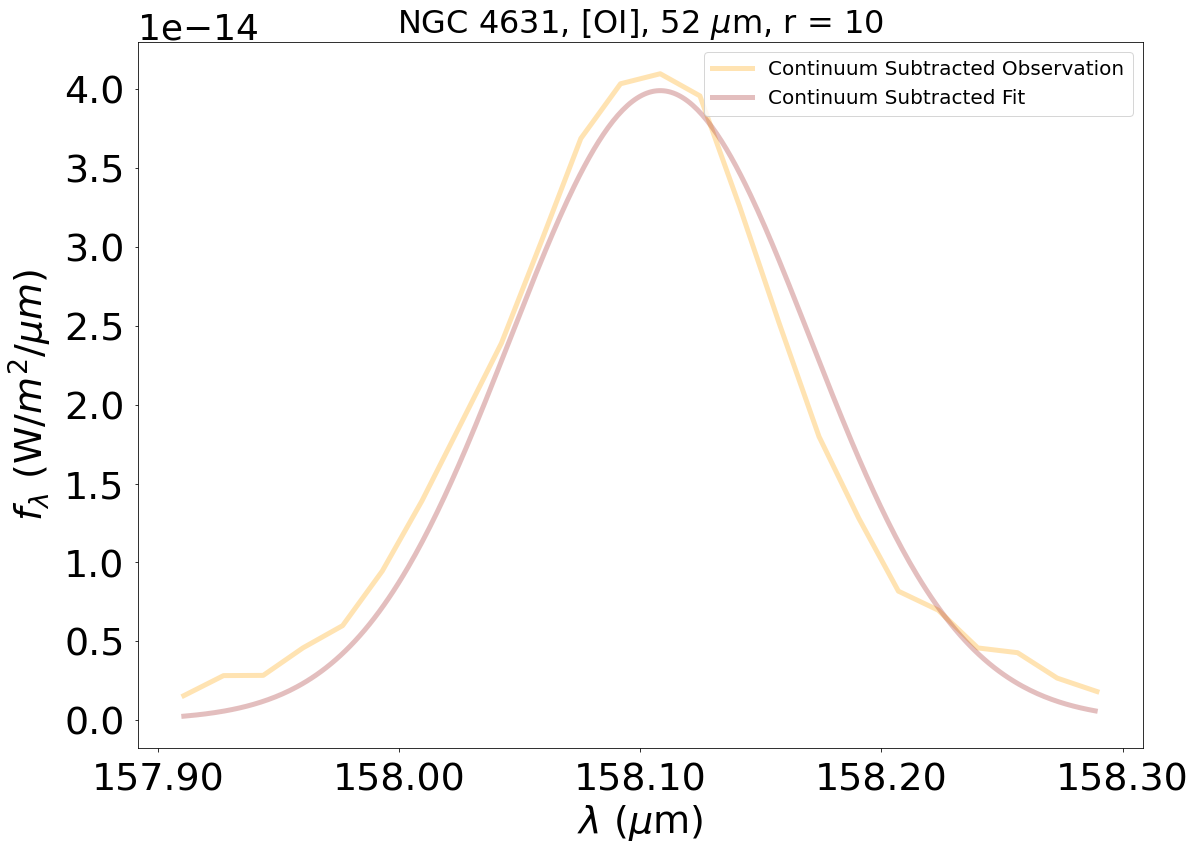

In [36]:
fig, ax = plt.subplots(figsize = (18, 13))

wavelength_range = np.arange(np.min(wavelengths_act), np.max(wavelengths_act), 0.001)

fitted_central_fluxes_continuum_subtracted_act = fit_func_1(wavelength_range, *fit_params)

print(fitted_central_fluxes_continuum_subtracted_act)

ax.plot(wavelengths_act, central_fluxes_continuum_subtracted_act, 
        label = 'Continuum Subtracted Observation', lw = 5, color = 'orange', alpha = 0.3)

ax.plot(wavelength_range, fitted_central_fluxes_continuum_subtracted_act, 
        label = 'Continuum Subtracted Fit', lw = 5, color = 'brown', alpha = 0.3)


ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OI], 52 $\mu$m, r = 10', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 20}, loc = 'upper right')

[2.56027823e-16 2.69417762e-16 2.83434658e-16 2.98103691e-16
 3.13450830e-16 3.29502841e-16 3.46287308e-16 3.63832637e-16
 3.82168074e-16 4.01323715e-16 4.21330515e-16 4.42220299e-16
 4.64025774e-16 4.86780536e-16 5.10519076e-16 5.35276793e-16
 5.61089996e-16 5.87995910e-16 6.16032686e-16 6.45239396e-16
 6.75656045e-16 7.07323565e-16 7.40283820e-16 7.74579605e-16
 8.10254643e-16 8.47353581e-16 8.85921986e-16 9.26006340e-16
 9.67654033e-16 1.01091335e-15 1.05583346e-15 1.10246442e-15
 1.15085713e-15 1.20106335e-15 1.25313565e-15 1.30712742e-15
 1.36309284e-15 1.42108684e-15 1.48116509e-15 1.54338399e-15
 1.60780058e-15 1.67447259e-15 1.74345833e-15 1.81481673e-15
 1.88860722e-15 1.96488975e-15 2.04372472e-15 2.12517295e-15
 2.20929561e-15 2.29615421e-15 2.38581048e-15 2.47832640e-15
 2.57376408e-15 2.67218571e-15 2.77365351e-15 2.87822969e-15
 2.98597633e-15 3.09695534e-15 3.21122838e-15 3.32885682e-15
 3.44990159e-15 3.57442319e-15 3.70248153e-15 3.83413590e-15
 3.96944486e-15 4.108466

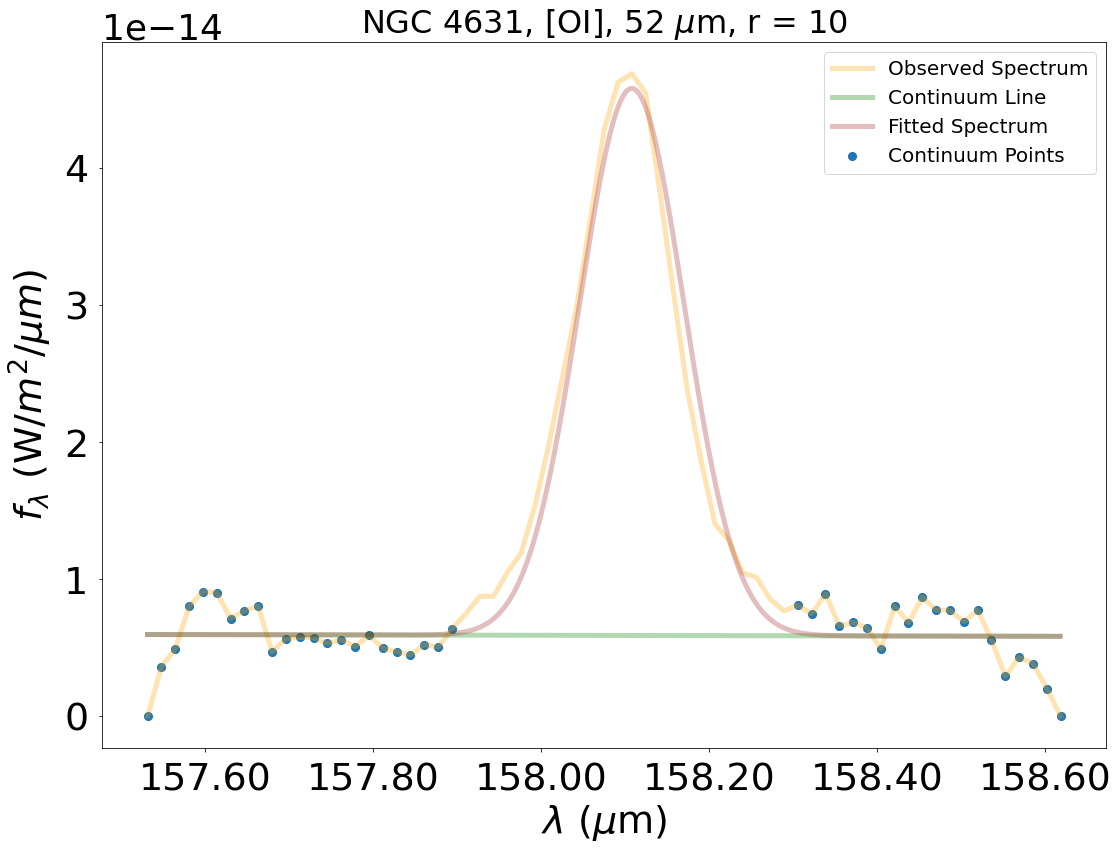

In [41]:
fig, ax = plt.subplots(figsize = (18, 13))

wavelength_range = np.arange(np.min(wavelengths_filtered), np.max(wavelengths_filtered), 0.001)
cont_line_filtered = cont_params[0]*wavelength_range + cont_params[1]

fitted_central_fluxes_act = fit_func_1(wavelength_range, *fit_params) + cont_line_filtered

print(fitted_central_fluxes_continuum_subtracted_act)

ax.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Observed Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.plot(wavelength_range, cont_line_filtered, label = 'Continuum Line', lw = 5, color = 'green', alpha = 0.3)
ax.plot(wavelength_range, fitted_central_fluxes_act, label = 'Fitted Spectrum', lw = 5, color = 'brown', alpha = 0.3)
ax.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OI], 52 $\mu$m, r = 10', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 20}, loc = 'upper right')

plt.savefig('/Users/thepoetoftwilight/Desktop/2-[OI]-filtered_spectrum.png')

In [39]:
flux_continuum = np.trapz(cont_line_filtered, x = wavelength_range, dx = wav_diff)
print(flux_continuum)

flux_obs = np.trapz(central_fluxes_filtered, x = wavelengths_filtered, dx = wav_diff)
flux_obs_sub = flux_obs - flux_continuum
print(flux_obs_sub)

flux_fit = np.trapz(fitted_central_fluxes_act, x = wavelength_range, dx = wav_diff)
flux_fit_sub = flux_fit - flux_continuum
print(flux_fit_sub)

6.398113472927239e-15
6.507386159159616e-15
6.2200422920581235e-15


In [40]:
print(2*np.sqrt(np.log(2))*fit_params[2])

0.1035349696246755
